## Bayesian Inference

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random


$P(x|a)=N(a)e^{-\frac{x^2}{2a ^2}}$

$\int^{\infty}_{- \infty}dx P(x|a) = 1$\
This gives us the proportionality function $N(a)$:\
$N(a)=\frac{1}{\int^{\infty}_{- \infty}dx e^{-\frac{x^2}{2a ^2}}}$ \
Using Bayes' Theorem:\
$P(a|\{x\})=\frac{P(\{x\}|a)P(a)}{P(\{x\})}=\frac{P(a)}{P(\{x\})}\cdot N^{n} e^{- \frac{\sum_{i} x_i}{2a^2}}=P(a) \cdot N^{n} e^{- \frac{\sum_{i} x_i}{2a^2}} \sim e^{- \frac{\sum_{i} x_i}{2a^2}}$ (Un-normalized) \
Creating 100 random samples:



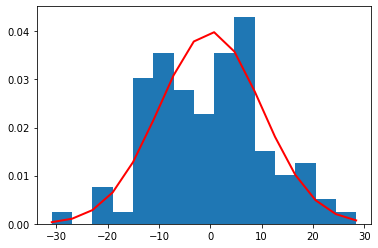

In [2]:
a = 10 # Variance
samples = np.random.normal(0, a, 100)
## Plotting the samples in a histogram and the probability function
count, bins, ignored = plt.hist(samples, 15, density=True)
plt.plot(bins, 1/(a * np.sqrt(2 * np.pi)) * np.exp( - (bins)**2 / (2 * a**2) ),linewidth=2, color='r')
plt.show()

The above figure shows the histogram and the probability function. (Referenced: https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html )


**Creating Markov Chain using Metropolis-Hastings Algorithm**

In [41]:
def g(xprime, xt):
    return 1/(np.sqrt(2 * np.pi) * a) * np.exp(-(xprime-xt)/ (2 * a ** 2))

def P(x):
    return 1/(a * np.sqrt(2 * np.pi)) * np.exp(-x/(2 * a ** 2))
x0= 0
x = [0]
t = 0
parameters = []

while len(x) < 200:
    xprime = random.uniform(-20,20)
    A = min(1, P(xprime) * g(x[-1],xprime)/ (P(x[-1]) * g(xprime, x[-1])))
    #A = min(1,  g(x[-1],xprime)/ g(xprime, x[-1]))
    parameters.append(A)
    u = random.uniform(0.0, 1.0)
    if u<= A:
        x.append(xprime)
    else:
        x.append(x[-1])
        
chain = x
print(chain)

[0, 9.490819247185982, 7.302501709226043, -7.966025776912776, 14.834467218006672, 3.507635123437769, -19.963846504029952, 10.819660126065894, 5.191892773101795, -16.635883264495416, -0.7493266610677125, 1.0275713255573216, -17.79230269816098, 5.398002180843765, -19.203431305060484, 13.782644283062119, -16.574682470555455, -2.2513639112821657, 14.877219503828975, -1.4177084659047914, -5.167347329789539, -4.700437895918723, 19.116267224901208, 8.832027102452045, -19.487808779586775, 19.689954144834417, 15.497798892607186, 10.443830356963009, 10.443830356963009, -1.4927701008629377, 3.322822893867116, 5.497398643651202, 16.337578370118152, -15.628079423712794, -1.322106486454917, 13.931940584586094, -1.3164705757683208, -19.778154291151143, -9.462046352475827, 2.0430913530335033, -18.250808001976925, 0.831082651240159, 10.411754040490049, 12.475373442510659, -14.845783958415915, 2.1256481237677782, -0.9066784398394709, -13.979618989663436, 11.330090368635716, -17.95563447455423, -3.520793

Plotting sample numbers vs parameter values:

Text(0, 0.5, 'Parameters')

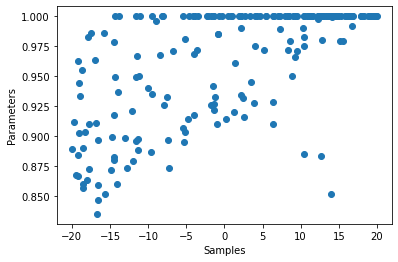

In [45]:
samples = np.linspace(-50, 50, 40)
plt.scatter(chain[1:], parameters)
plt.xlabel("Samples")
plt.ylabel("Parameters")

Graph of histogram of chain and probability function is given below:

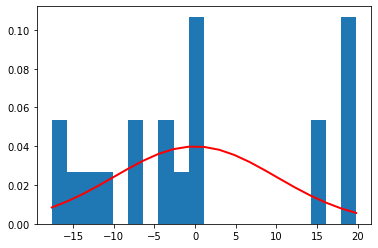

In [38]:
## Plotting the chain in a histogram and the probability function
count, bins, ignored = plt.hist(chain, 20, density=True)
plt.plot(bins, 1/(a * np.sqrt(2 * np.pi)) * np.exp( - (bins)**2 / (2 * a**2) ),linewidth=2, color='r')
plt.show()